# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kane\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])
newsapi

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
ethereum_article = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df.head()

,text,compound,positive,negative,neutral
0,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
3,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948
4,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_article["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df.head()

,text,compound,positive,negative,neutral
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
1,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.000,0.833
2,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
3,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
4,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.092659,0.058310,0.032610,0.909070
std,0.338825,0.058088,0.049319,0.076612
min,-0.757900,0.000000,0.000000,0.708000
25%,0.000000,0.000000,0.000000,0.859000
50%,0.051600,0.049000,0.000000,0.922000
75%,0.340000,0.095500,0.058250,0.974500
max,0.855500,0.240000,0.208000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.123753,0.065380,0.032980,0.901650
std,0.380272,0.073183,0.054613,0.087977
min,-0.893400,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.838000
50%,0.000000,0.057000,0.000000,0.910500
75%,0.421500,0.102750,0.064250,1.000000
max,0.941300,0.308000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum, with a positive mean score of .065.

Q: Which coin had the highest compound score?

A: Ethereum, with a compound max of .941

Q. Which coin had the highest positive score?

A: Ethereum, with a positive max of .308

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)  
    # Remove the stopwords
    words = word_tokenize(re_clean)   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [13]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['Tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,compound,positive,negative,neutral,Tokens
0,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
1,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000,"[four, month, twitter, first, introduced, inap..."
2,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
3,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948,"[recentlyinstalled, bitcoin, atm, today, bitco..."
4,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954,"[government, el, salvador, purchased, least, b..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['Tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,Tokens
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
1,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.000,0.833,"[broader, crypto, world, enjoys, late, summer,..."
2,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
3,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694,"[opensea, isnt, wasting, much, time, head, pro..."
4,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892,"[robinhood, plan, start, cryptocurrency, walle..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(bitcoin_ngram).most_common(10)

[(('el', 'salvador'), 24),
 (('legal', 'tender'), 18),
 (('sept', 'reuters'), 14),
 (('bitcoin', 'legal'), 13),
 (('el', 'salvadors'), 11),
 (('illustration', 'taken'), 10),
 (('reuters', 'el'), 10),
 (('cryptocurrency', 'bitcoin'), 9),
 (('representation', 'cryptocurrency'), 8),
 (('bitcoin', 'seen'), 8)]

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('illustration', 'taken'), 11),
 (('bitcoin', 'ethereum'), 9),
 (('sept', 'reuters'), 8),
 (('york', 'sept'), 7),
 (('cryptocurrencies', 'bitcoin'), 7),
 (('ethereum', 'dogecoin'), 7),
 (('dogecoin', 'ripple'), 7),
 (('ripple', 'litecoin'), 7),
 (('litecoin', 'placed'), 7),
 (('placed', 'pc'), 7)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_BTC_words = tokenizer(bitcoin_df.text.str.cat())
token_count(top_BTC_words, 10)

[('bitcoin', 88),
 ('salvador', 41),
 ('reuters', 41),
 ('el', 40),
 ('cryptocurrency', 35),
 ('legal', 23),
 ('country', 19),
 ('charsa', 19),
 ('tender', 18),
 ('sept', 17)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
top_ETH_words = tokenizer(ethereum_df.text.str.cat())
token_count(top_ETH_words, 10)

[('cryptocurrency', 30),
 ('bitcoin', 30),
 ('ha', 27),
 ('reuters', 21),
 ('ethereum', 20),
 ('cryptocurrencies', 14),
 ('crypto', 13),
 ('taken', 12),
 ('market', 12),
 ('illustration', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

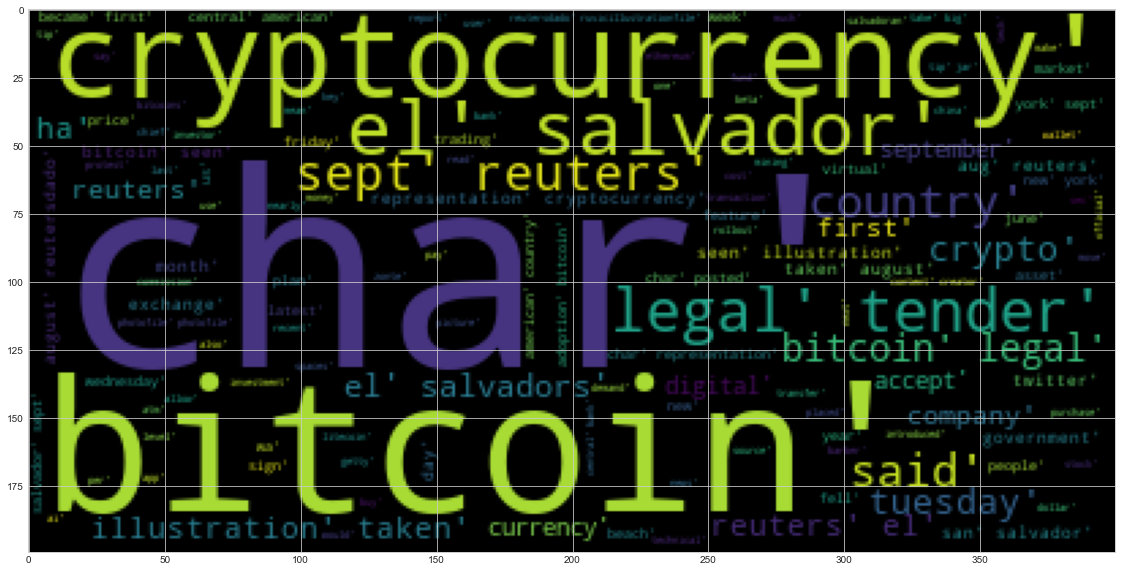

In [22]:
# Generate the Bitcoin word cloud
bitcoin_wordcloud = bitcoin_df['Tokens'].astype(str)
btc_wc = WordCloud().generate(' '.join(bitcoin_wordcloud))
plt.imshow(btc_wc)

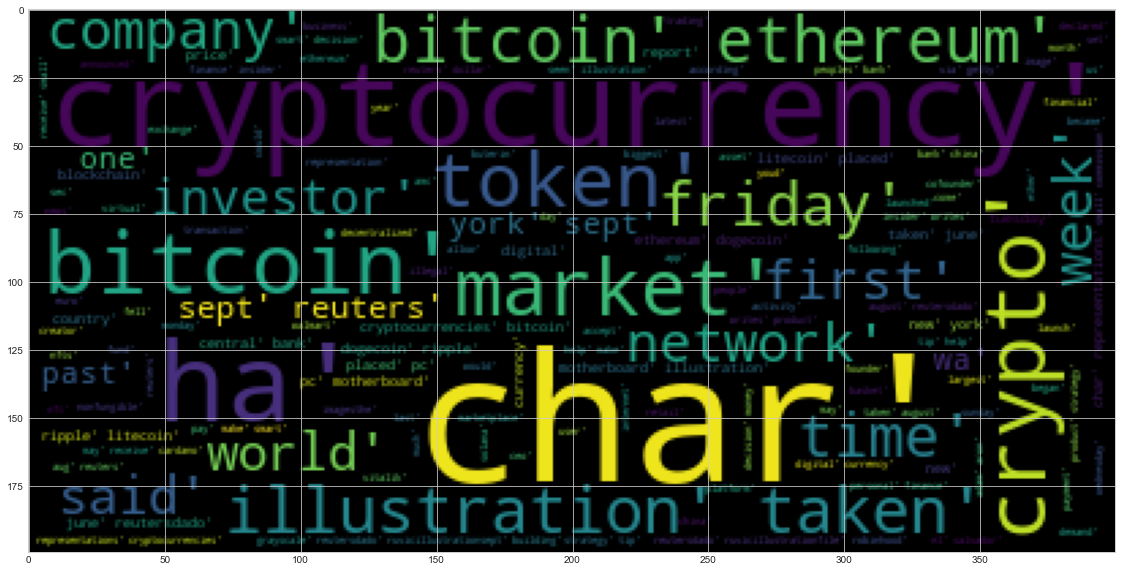

In [23]:
# Generate the Ethereum word cloud
ethereum_wc = ethereum_df['Tokens'].astype(str)
eth_wc = WordCloud().generate(' '.join(ethereum_wc))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

"You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars]Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a form o

In [28]:
# Run the NER processor on all of the text
doc_btc = nlp(all_btc_text)

# Add a title to the document
doc_btc.user_data["title"] = "BTC Named Entity Recognition"

In [29]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [30]:
# List all Entities
print([ent.text for ent in doc_btc.ents if ent.label_])

['AMC', 'Adam Aron', 'Ethereum', 'months', 'Alex Castro', 'The Verge\r\n', 'The Peoples Bank of China', 'Friday', 'Bitcoin ATM', 'today', 'El Salvador', 'US', 'Central American', 'first', 'El Salvador', 'at least 200', 'Tuesday', 'Th', 'Thousands', 'El Salvador', 'Nayi', 'Joe', 'TidyCyber reporter', 'Chris', 'almost 2,500', '2,100', 'Chris', 'chars]New York', 'CNN', 'a volatile day', 'about 10%', 'Tuesday', '$43,000 mark', 'El Salvador', 'June', 'chars]8', 'just days', 'September', 'spring', 'Rebecca McMackin', 'August 6, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7', 'Reuters', '16', 'August 6, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File', '15', 'Reuters', 'Adam Aron', 'El Zonte', 'El Salvador', 'Bitcoin Beach', 'Central American', 'Conway G. Gittens', '27', 'Reuters', 'first', 'ATM', 'Honduras', 'this week', 'El Salvador', 'first', 'El Zonte', 'El Salvador', 'Bitcoin Beach', 'Central American', 'Conway G. Gittens', '27', 'Reuters', 

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

"Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]OpenSea isn't wasting much time after its head of product was accused of exploiting insider information to turn a profit on non-fungible tokens. The marketplace has asked for and accepted Nate Chasta… [+924 chars]Robinhood plans to start a cryptocurrency wallet next month, the company announced on Wednesday. The tool will allow you to send and receive

In [32]:
# Run the NER processor on all of the text
doc_eth = nlp(all_eth_text)

# Add a title to the document
doc_eth.user_data["title"] = "ETH Named Entity Recognition"

In [33]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in doc_eth.ents if ent.label_])

['Alex Castro', 'The Verge\r\n', 'The Peoples Bank of China', 'Friday', 'late summer', 'AMC', 'Adam Aron', 'Ethereum', 'Nate Chasta', '+924', 'next month', 'Wednesday', "captionChloe Clem's", 'two-year-old', 'French', 'Sorare', 'SoftBank', 'Vision Fund 2', '$680 million', '4', 'Vitalik Buterin', '2013', 'Getty Images', 'John Phillips', 'Vitalik Buterin', 'eight', 'this past weekend', 'El Salvador', 'Elizabeth Warren', 'AFP', 'Getty Images', 'Elizabeth Warren', 'Sullivan', 'Getty Images\r\nCitigroup', 'CoinDesk', 'two', 'one', '25', 'Reuters', 'September', 'August 6, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File', '15', 'Reuters', 'Adam Aron', 'above $100', 'first', 'Monday', 'more than 200%', 'August', 'first', '$311 billion', 'Q2 2021', 'Insider Intellige', '2015', 'John Phillips', 'Vitalik Buterin', 'Time', '100', 'the past decade', 'Kyle Russell', 'Playbyte', 'Last Friday', 'Dom Hofmann', 'one', 'Rosenfeld', 'FTX', '500', 'NFT', 'Tuesday', 'Solana', 'seventh', 'Dogecoin', "Elon Mu

---